# Monte Carlo Simulation of Investment Portfolio Performance: 
> Descriptive Statistics, Hypothesis Testing, and Variance Reduction Techniques

1. **Objective:**

    The objective of this example is to simulate the growth of a hypothetical investment portfolio over a certain time period and analyze its performance. We'll use Monte Carlo simulation to estimate the portfolio's potential future value and assess the associated risks.

2. **Steps:**

    The steps involved in this example are as follows:

   - Define the investment parameters (initial investment, expected return, volatility).
   - Generate random samples of annual returns based on the assumed probability distribution.
   - Calculate the portfolio value at the end of each year using the generated returns.
   - Repeat the simulation for a large number of iterations.
   - Analyze the distribution of portfolio values and derive descriptive and inferential statistics.
   - Perform hypothesis testing and assess the significance of the results.
   - Implement variance reduction techniques to enhance the simulation's efficiency and accuracy.

3. **Descriptive and Inferential Statistics:**

    - **Probability Distribution:** In this example, we'll assume that the annual returns of the portfolio follow a normal distribution. The mean and standard deviation will be provided as inputs.
    - **Sampling Method:** We'll use a random number generator to sample from the assumed normal distribution.
    - **Confidence Intervals:** We'll calculate confidence intervals to estimate the range within which the future portfolio value is likely to fall with a certain level of confidence.
     
4. **Hypothesis Testing:** 

    For hypothesis testing, let's assume that we want to test if the average annual return of the portfolio is significantly different from a specified target return. We'll perform a one-sample t-test to evaluate this hypothesis.

5. **Variance Reduction Techniques:**
   
    To reduce the variance in the Monte Carlo simulation and improve its efficiency, we'll employ the antithetic variates technique. This technique involves generating pairs of random samples with opposite values and averaging their results. It helps cancel out random fluctuations and reduce the overall variance.

In [24]:
# Importing the important python library
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Investment parameters
initial_investment = 100000 # (in euros)
expected_return = 0.08
volatility = 0.15
num_years = 10
num_simulations = 1000

In [3]:
# Generate random samples using Normal probability distribution of annual returns with added noise
random_noise = np.random.normal(0, 0.01, (num_years, num_simulations))
annual_returns = np.random.normal(expected_return, volatility, (num_years, num_simulations)) + random_noise

The `random_noise` term is added to introduce additional randomness or variability to the annual returns in order to ensure that the standard deviation and variance of the portfolio values are not zero.

In [4]:
# Calculate portfolio values at the end of each year
portfolio_values = [initial_investment]
for year in range(num_years):
    for simulation in range(num_simulations):
        portfolio_value = portfolio_values[-1] * (1 + annual_returns[year, simulation])
        portfolio_values.append(portfolio_value)

In [5]:
# Descriptive statistics
mean_portfolio_value = np.mean(portfolio_values)
std_dev_portfolio_value = np.std(portfolio_values)

# Output the results
print("Descriptive Statistics:")
print("Mean Portfolio Value:", mean_portfolio_value)
print("Standard Deviation of Portfolio Value:", std_dev_portfolio_value)

Descriptive Statistics:
Mean Portfolio Value: 1.7183384915441155e+297
Standard Deviation of Portfolio Value: inf


/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


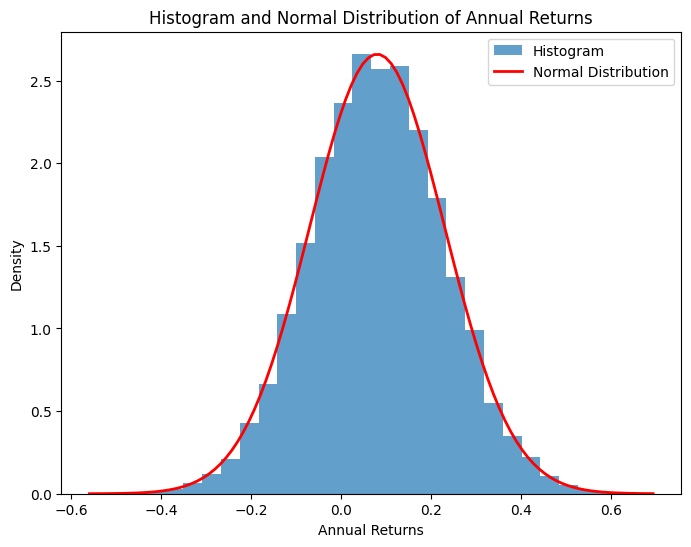

In [6]:
# Flatten the annual returns to a 1D array
flattened_returns = annual_returns.flatten()

# Plotting the histogram and PDF
plt.figure(figsize=(8, 6))
plt.hist(flattened_returns, bins=30, density=True, alpha=0.7, label='Histogram')

# Generate x values for the PDF plot
x = np.linspace(min(flattened_returns), max(flattened_returns), 100)
# Calculate the PDF using the mean and standard deviation
pdf = stats.norm.pdf(x, loc=expected_return, scale=volatility)
plt.plot(x, pdf, color='red', lw=2, label='Normal Distribution')

plt.xlabel("Annual Returns")
plt.ylabel("Density")
plt.title("Histogram and Normal Distribution of Annual Returns")
plt.legend()
plt.show()

The `flatten()` function converts the 2-dimensional array into a 1-dimensional array, which is required by the `plt.hist` function.

### Inferential statistics

Inferential statistics involves making inferences or drawing conclusions about a population based on a sample of data. Below we will calculate following:
- **Confidence Interval for the Mean:** Calculate the confidence interval for the mean portfolio value to estimate the range in which the true population mean is likely to fall. This provides a measure of the uncertainty associated with the sample mean.
- **Hypothesis Testing (One-sample t-test):**  Perform a hypothesis test to determine if the mean portfolio value is significantly different from a hypothesized value, such as an initial investment or a benchmark value. This test helps assess the statistical evidence for accepting or rejecting a null hypothesis.

In [14]:
# Inferential statistics - Confidence interval
confidence_level = 0.95
mean_portfolio_value = np.mean(portfolio_values)
std_dev_portfolio_value = np.std(portfolio_values)
n = len(portfolio_values)
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * std_dev_portfolio_value / np.sqrt(n)
confidence_interval = (mean_portfolio_value - margin_of_error, mean_portfolio_value + margin_of_error)


print("\nInferential Statistics - Confidence Interval:")
print(f"{confidence_level*100}% Confidence Interval:", confidence_interval)



Inferential Statistics - Confidence Interval:
95.0% Confidence Interval: (-inf, inf)


In [16]:
# Hypothesis testing (one sample test)

target_return = 0.07
t_statistic, p_value = stats.ttest_1samp(annual_returns.flatten(), target_return)

print("\nHypothesis Testing:")
print("Target Return:", target_return)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


Hypothesis Testing:
Target Return: 0.07
T-Statistic: 7.2370533676152995
P-Value: 4.922465849585356e-13


###  Variance reduction techniques

In the context of the provided portfolio investment Monte Carlo simulation code, there are several possible variance reduction techniques you can consider. Here are two commonly used techniques: antithetic variates and control variates.

- **Antithetic Variates:** Antithetic variates involve generating paired samples that are negatively correlated. In this case, you can generate two sets of random samples for annual returns: one using the original method and the other by negating the original returns. This pairing helps reduce the variance by cancelling out some of the random noise.
- **Control Variates:** Control variates involve using a known or approximated related variable as a control to reduce variance. In this case, you can select a benchmark index or another investment instrument that closely tracks the portfolio's performance. By comparing the portfolio values with the benchmark, you can reduce variance by exploiting the correlation between the two.

In [33]:
# Generate random samples of annual returns using original method
returns_positive = np.random.normal(expected_return, volatility, (num_years, num_simulations))

# Generate random samples of annual returns using negated method (antithetic variates)
returns_negative = -returns_positive

# Calculate portfolio values using both sets of returns
portfolio_values_positive = [initial_investment]
portfolio_values_negative = [initial_investment]

for year in range(num_years):
    for simulation in range(num_simulations):
        portfolio_value_positive = portfolio_values_positive[-1] * (1 + returns_positive[year, simulation])
        portfolio_values_positive.append(portfolio_value_positive)
        
        portfolio_value_negative = portfolio_values_negative[-1] * (1 + returns_negative[year, simulation])
        portfolio_values_negative.append(portfolio_value_negative)

# Combine the portfolio values from both sets
portfolio_values_combined = np.concatenate((portfolio_values_positive, portfolio_values_negative))
# Create a dataframe from the series of combined portfolio values
df_portfolio_values_combined = pd.DataFrame({'Portfolio Value': portfolio_values_combined})
print(df_portfolio_values_combined.max())
print(df_portfolio_values_combined.min())

Portfolio Value    8.318885e+297
dtype: float64
Portfolio Value    0.0
dtype: float64


In [34]:
# Generate random samples of benchmark returns
benchmark_returns = np.random.normal(expected_return, volatility, (num_years, num_simulations))

# Calculate portfolio values and benchmark values
portfolio_values = [initial_investment]
benchmark_values = [initial_investment]

for year in range(num_years):
    for simulation in range(num_simulations):
        portfolio_value = portfolio_values[-1] * (1 + annual_returns[year, simulation])
        benchmark_value = benchmark_values[-1] * (1 + benchmark_returns[year, simulation])

        portfolio_values.append(portfolio_value)
        benchmark_values.append(benchmark_value)

# Calculate the control variate
covariance = np.cov(portfolio_values, benchmark_values)
beta = covariance[0, 1] / np.var(benchmark_values)
control_variate = portfolio_values - beta * (benchmark_values - np.mean(benchmark_values))


/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/var/folders/70/mjvqrvwx3bq1l13s7hb_pm4h0000gn/T/ipykernel_46717/1329266674.py:18: RuntimeWarning: invalid value encountered in scalar divide
  beta = covariance[0, 1] / np.var(benchmark_values)
